<a href="https://colab.research.google.com/github/sudama-inc/Machine-Learning-Classification-Models/blob/main/mlClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Porto Seguro’s Safe Driver Prediction**
> The aim of this compitation is to predict probability that a driver will intiate an auto insurance claim next year.A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.




**Steps**


1.   Read data set
2.   Explore data set
3.   Correlation plot
4.   Missing value is data set
5.   Convert variables into category type
6.   Univariate analysis
7.   Descrictive Statistic Features
8.   Determine outliers in dataset
9.   One Hot Encoding
10.   Split data set
11.   Hyperparameter tuning
12.   Logistic Regression model
13.   Model performance
14.   Reciever Operating Charactaristics
15.   Predict for unseen data set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mssno
%matplotlib inline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

In [3]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


1.   **Read the Train & Test dataset**

In [5]:
train_df = pd.read_csv("/content/drive/My Drive/Datasets/porto-seguro-safe-driver-prediction-dataset/train.csv")
test_df = pd.read_csv("/content/drive/My Drive/Datasets/porto-seguro-safe-driver-prediction-dataset/test.csv")

In [6]:
display(train_df.head(2))
print('-'*50)
display(test_df.head(2))

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0


--------------------------------------------------


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1


2.   **Explore data set**

In [7]:
print(train_df.columns)

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [8]:
print(len(train_df.columns))
print(len(test_df.columns))

59
58


In [9]:
print(len(train_df.shape))
print(len(test_df.shape))

2
2


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

Doesn't have any categorical columns in our dataframe

In [11]:
len(train_df.select_dtypes('object').columns)

0

Values of -1 indicate that the feature was missing from the observation.

Visualize (Analysing) the target variable

0    573518
1     21694
Name: target, dtype: int64
------------------------------


<Axes: >

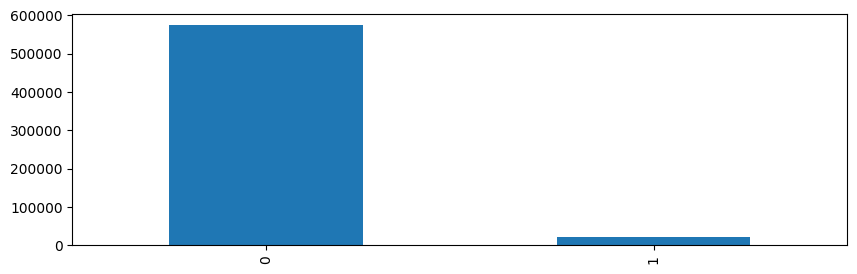

In [12]:
print(train_df.target.value_counts())
print('-'*30)
plt.figure(figsize=(10,3))
train_df.target.value_counts().plot(kind='bar')

In [13]:
# plt.figure(figsize=(10,3))
# sns.countplot(data=train_df, x='target', palette='rainbow')
# plt.xlabel('Target')

The 'target' variable in imbalanced. The target column in data set is whether or not claim was filed for that policy holder. The target variable is quite unbalanced, with only %4 of policyholders in training data filing claim within the year.

In [14]:
print('Category 0 % : ', round(((train_df.target.value_counts().values[0]) / train_df.shape[0])*100))
print('Category 1 % : ', round(((train_df.target.value_counts().values[1]) / train_df.shape[0])*100))

Category 0 % :  96
Category 1 % :  4


3.   **Correlation plot**

<Axes: >

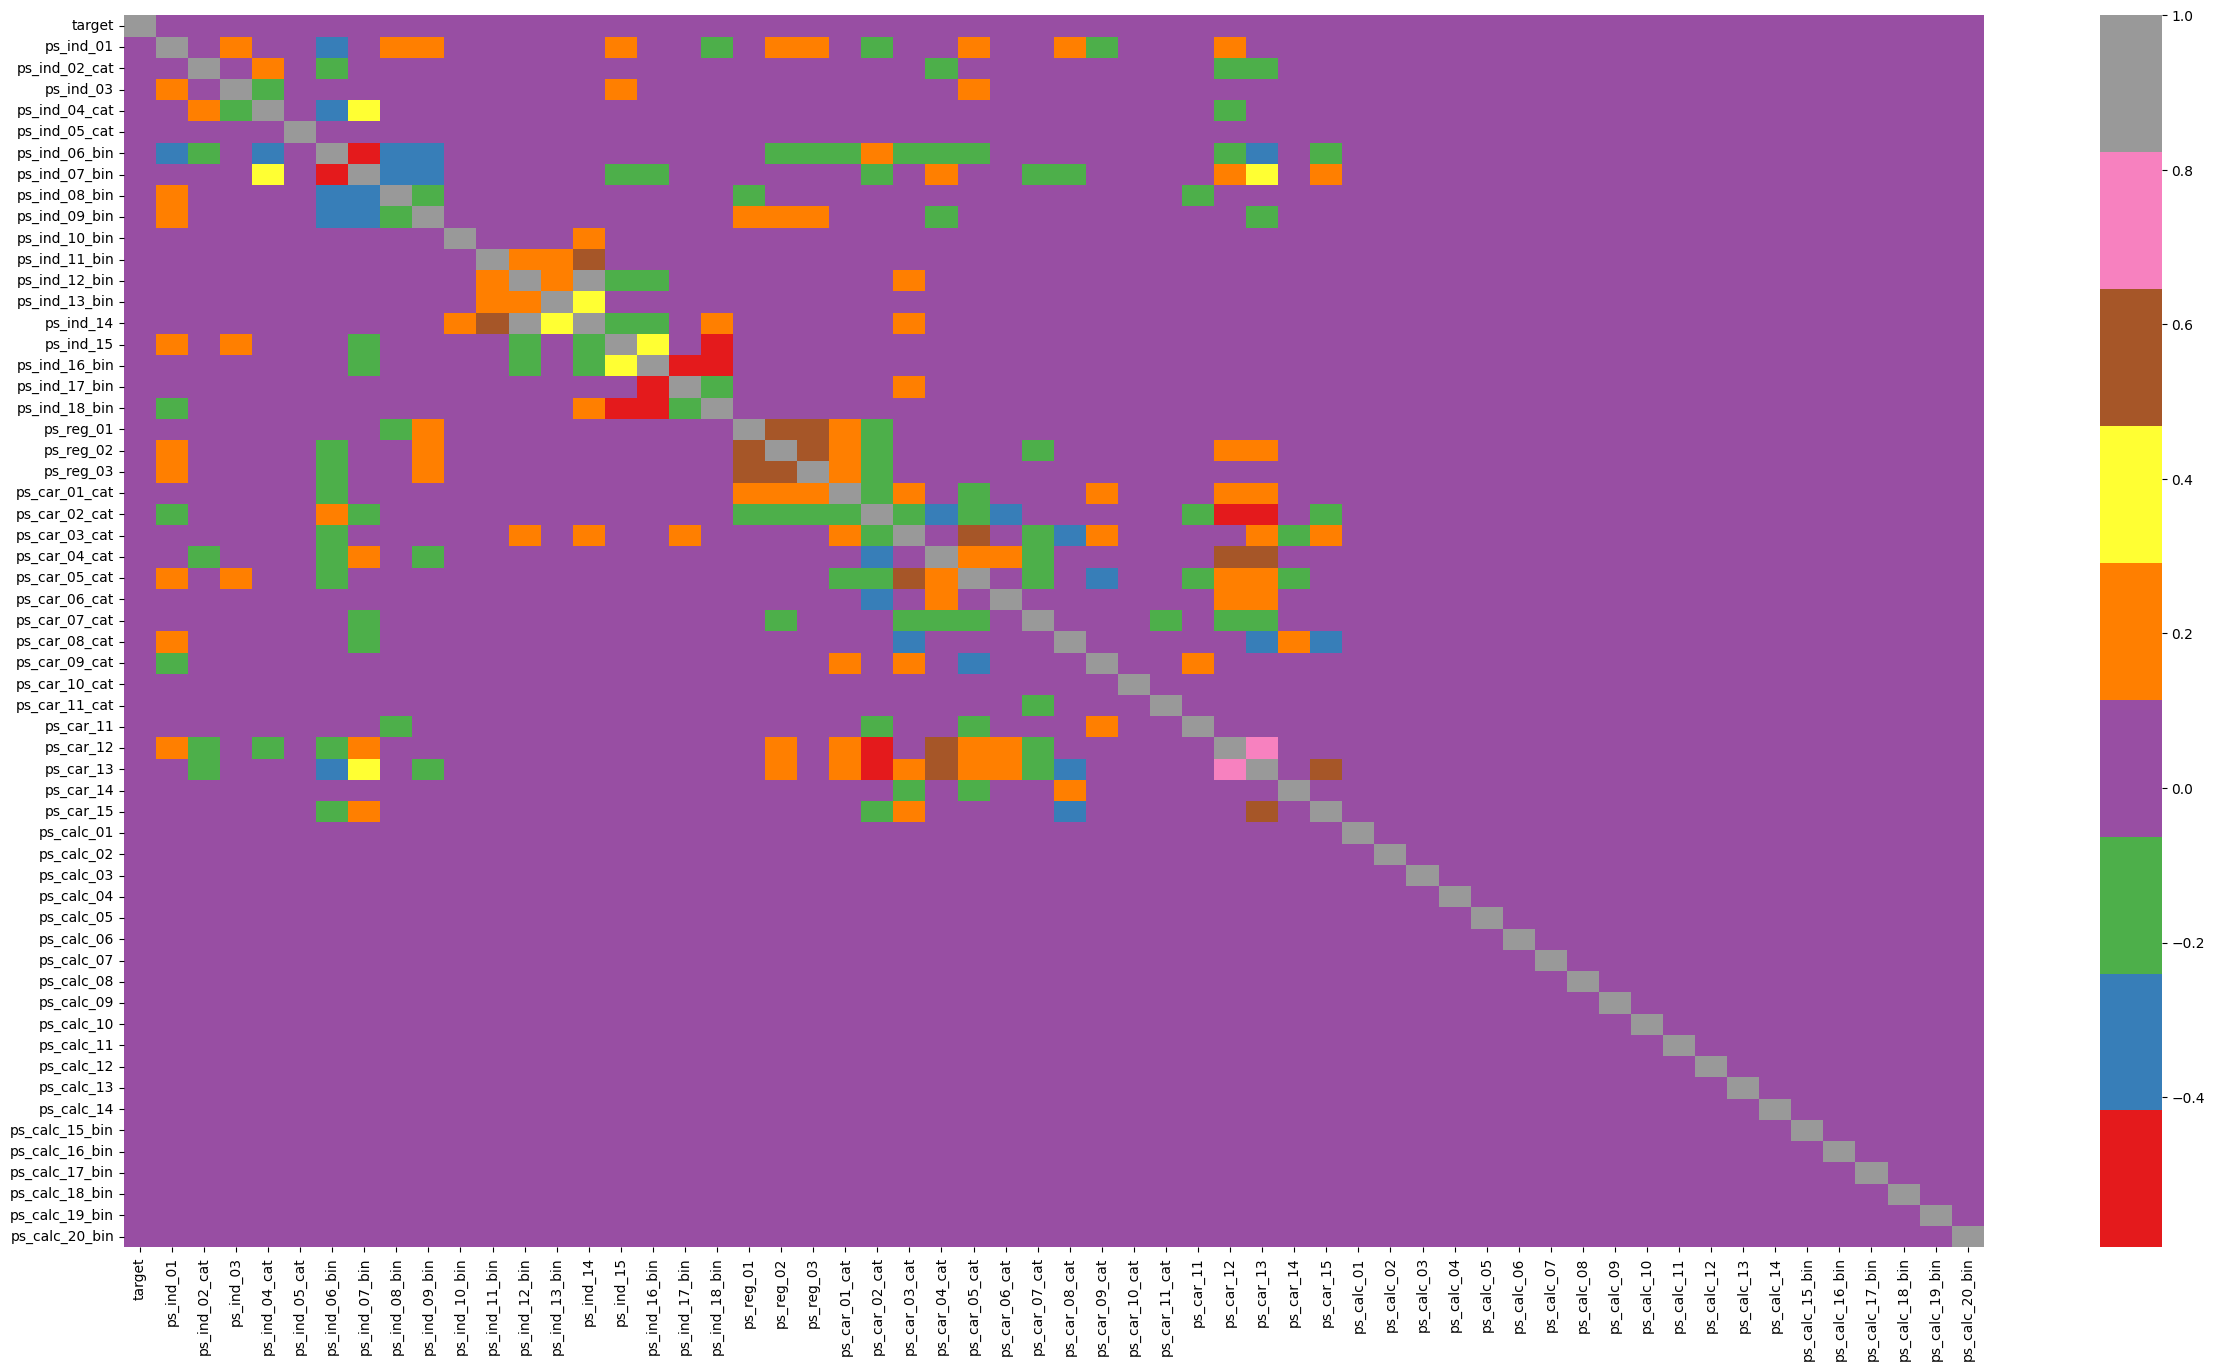

In [15]:
cor = train_df.drop('id', axis=1).corr()
plt.figure(figsize=(30,16))
# sns.heatmap(cor, cmap='crest', linewidth=.1, linecolor='white', annot=cor.rank(axis="columns"))
sns.heatmap(cor,cmap='Set1')

#### The correlation coefficient for ps_calc is 0,so we will drop these from our dataset.

In [16]:
ps_cal = train_df.columns[train_df.columns.str.startswith('ps_calc')]
ps_cal

Index(['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object')

In [17]:
train_df = train_df.drop(ps_cal, axis=1)
test_df = test_df.drop(ps_cal, axis=1)

In [18]:
print(train_df.shape)
print(test_df.shape)

(595212, 39)
(892816, 38)


4.   **Missing value in data set**
> Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.
*   So replace the -1 as np.nan

train_df.replace(-1, np.nan, inplace=True)

In [19]:
train_df.replace(-1, np.nan, inplace=True)

<Axes: >

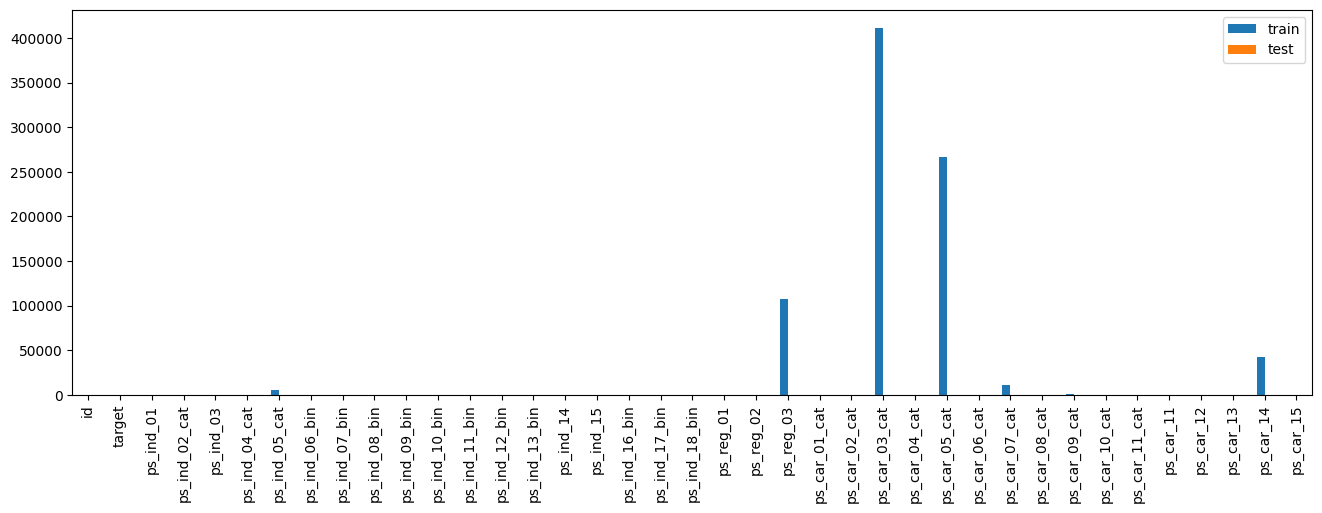

In [20]:
k= pd.DataFrame()
k['train']= train_df.isnull().sum()
k['test'] = test_df.isnull().sum()
fig,ax = plt.subplots(figsize=(16,5))
k.plot(kind='bar',ax=ax)

**Replace missing value with mode**

In [21]:
def missing_value(df):
  col = df.columns
  for i in col:
    if df[i].isnull().sum() > 0:
      df[i].fillna(df[i].mode()[0],inplace=True)

In [22]:
missing_value(train_df)
missing_value(test_df)

Count Unique values and Convert it into category data type

In [23]:
def basic_details(df):
  b = pd.DataFrame()
  b['Missing value'] = df.isnull().sum()
  b['N unique value'] = df.nunique()
  b['dtype'] = df.dtypes
  return b

basic_details(train_df)

,Missing value,N unique value,dtype
id,0,595212,int64
target,0,2,int64
ps_ind_01,0,8,int64
ps_ind_02_cat,0,4,float64
ps_ind_03,0,12,int64
ps_ind_04_cat,0,2,float64
ps_ind_05_cat,0,7,float64
ps_ind_06_bin,0,2,int64
ps_ind_07_bin,0,2,int64
ps_ind_08_bin,0,2,int64


5.   **Convert variables into category type**
> Convert the columns as Category which is having the unique value caount less then 120.

In [24]:
def category_type(df):
  for i in df.columns:
    if df[i].nunique() <= 20:
      df[i] = df[i].astype('category')

category_type(train_df)
category_type(test_df)

6.   **Univariate analysis**

In [25]:
cat_col = [col for col in train_df.columns if '_cat' in col]
print(len(cat_col))
print(cat_col)

14
['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [26]:
bin_col = [col for col in train_df.columns if 'bin' in col]
print(len(bin_col))
print(bin_col)

11
['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']


In [27]:
tot_cat_col = list(train_df.select_dtypes(include=['category']).columns)
other_cat_col = [c for c in tot_cat_col if c not in cat_col + bin_col]
other_cat_col

['target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_car_11',
 'ps_car_15']

<Axes: xlabel='ps_ind_15', ylabel='count'>

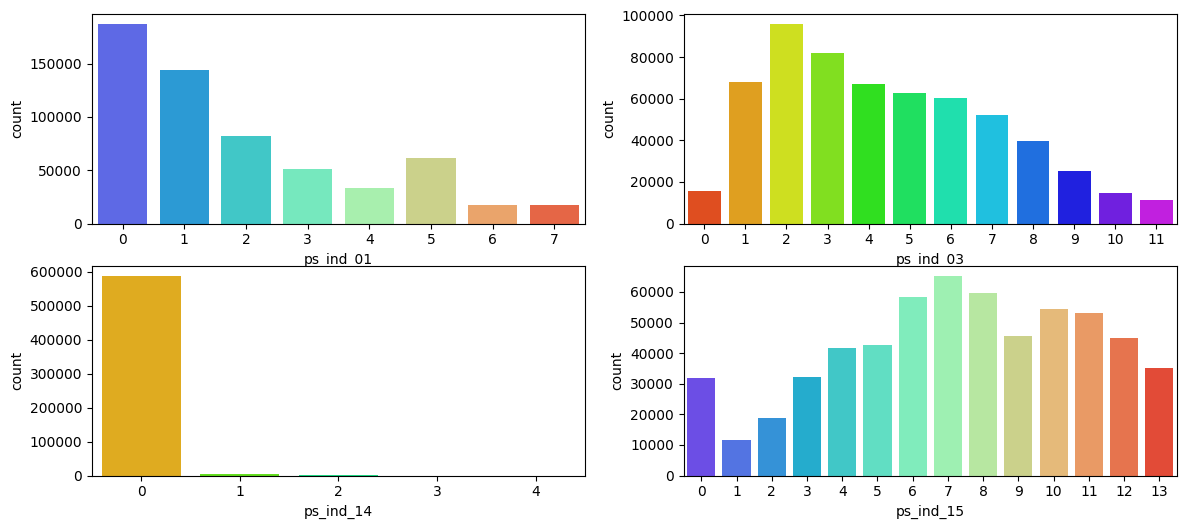

In [28]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=train_df,x='ps_ind_01',palette='rainbow',ax=ax1)
sns.countplot(data=train_df,x='ps_ind_03',palette='gist_rainbow',ax=ax2)
sns.countplot(data=train_df,x='ps_ind_14',palette='gist_rainbow',ax=ax3)
sns.countplot(data=train_df,x='ps_ind_15',palette='rainbow',ax=ax4)

In [29]:
num_col = [c for c in train_df.columns if c not in tot_cat_col]
num_col.remove('id')
num_col

['ps_reg_03', 'ps_car_11_cat', 'ps_car_12', 'ps_car_13', 'ps_car_14']

<ipython-input-30-68342d94eba5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['ps_reg_03'],bins=100,color='red',ax=ax1)


<Axes: xlabel='ps_reg_03', ylabel='target'>

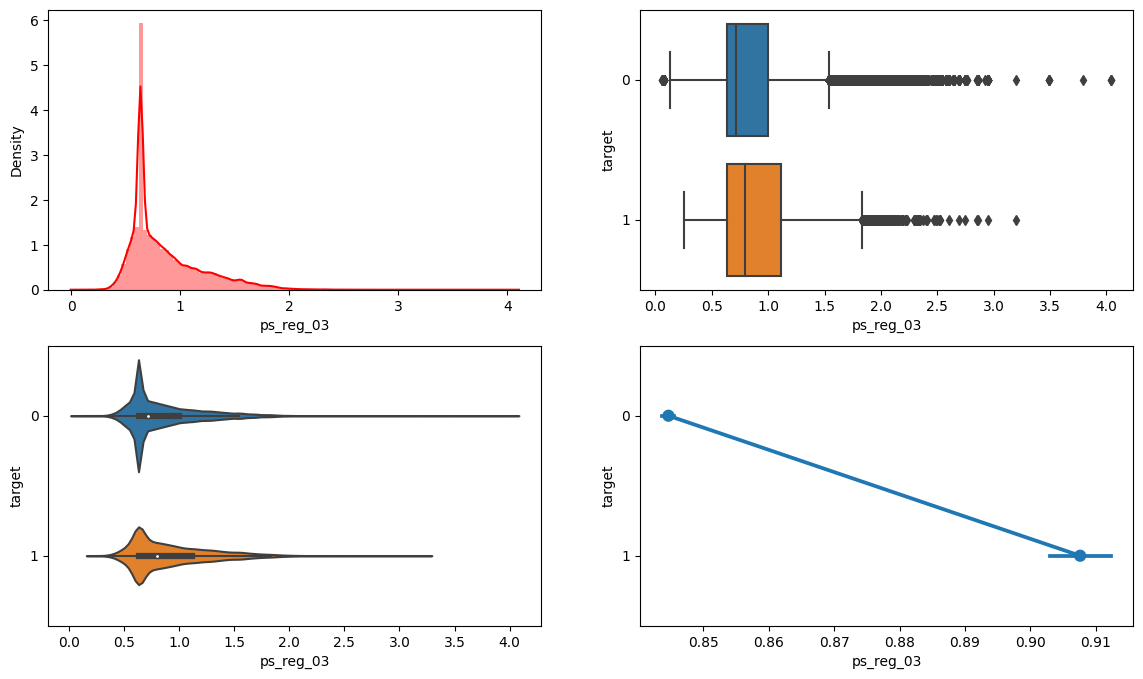

In [30]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train_df['ps_reg_03'],bins=100,color='red',ax=ax1)
sns.boxplot(x ='ps_reg_03',y='target',data=train_df,ax=ax2)
sns.violinplot(x ='ps_reg_03',y='target',data=train_df,ax=ax3)
sns.pointplot(x= 'ps_reg_03',y='target',data=train_df,ax=ax4)

7.   **Descrictive Statistic Features**

In [31]:
def descrictive_stat_feat(df):
    df = pd.DataFrame(df)
    dcol= [c for c in train_df.columns if train_df[c].nunique()>=10]
    dcol.remove('id')
    dcol.remove('ps_ind_03')
    dcol.remove('ps_ind_15')
    dcol.remove('ps_reg_01')
    dcol.remove('ps_reg_02')
    dcol.remove('ps_car_01_cat')
    dcol.remove('ps_car_04_cat')
    dcol.remove('ps_car_06_cat')
    dcol.remove('ps_car_11_cat')
    dcol.remove('ps_car_15')

    d_median = df[dcol].median(axis=0)
    d_mean = df[dcol].mean(axis=0)
    q1 = df[dcol].apply(np.float32).quantile(0.25)
    q3 = df[dcol].apply(np.float32).quantile(0.75)

    #Add mean and median column to data set having more then 10 categories
    for c in dcol:
        df[c+str('_median_range')] = (df[c].astype(np.float32).values > d_median[c]).astype(np.int8)
        df[c+str('_mean_range')] = (df[c].astype(np.float32).values > d_mean[c]).astype(np.int8)
        df[c+str('_q1')] = (df[c].astype(np.float32).values < q1[c]).astype(np.int8)
        df[c+str('_q3')] = (df[c].astype(np.float32).values > q3[c]).astype(np.int8)
    return df

In [32]:
train_df = descrictive_stat_feat(train_df)
test_df = descrictive_stat_feat(test_df)

**Correlation plot**

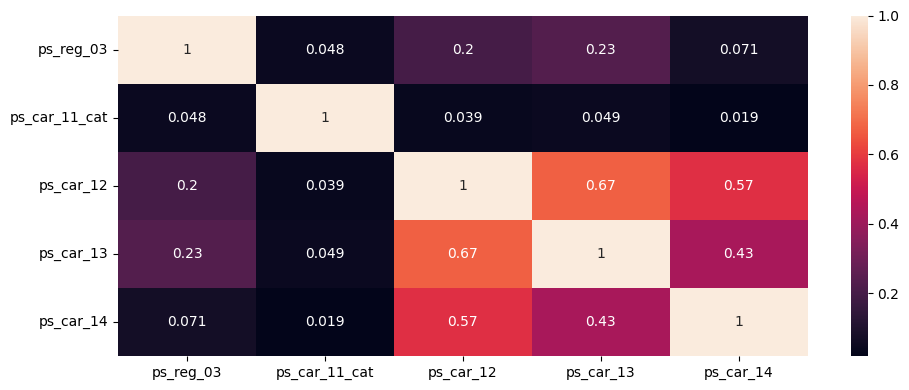

In [33]:
cor = train_df[num_col].corr()
plt.figure(figsize=(10,4))
sns.heatmap(cor,annot=True)
plt.tight_layout()

8.   **Determine outliers in dataset**
> The extreme observations in data set which resembles completely different behavoir from the rest of data point are called outliers. The outliers present in numeric feature are replaced by 1%/99% of feature.



In [34]:
def outlier(df, columns):
  for i in columns:
    quartile_1,quartile_3 = np.percentile(df[i], [25,75])
    quartile_f,quartile_l = np.percentile(df[i],[1,99])
    IQR = quartile_3 - quartile_1
    lower_bound = quartile_1 - (1.5*IQR)
    upper_bound = quartile_3 + (1.5*IQR)
    print(i,lower_bound,upper_bound,quartile_f,quartile_l)
    df[i].loc[df[i] < lower_bound] = quartile_f
    df[i].loc[df[i] > upper_bound] = quartile_l

outlier(train_df, num_col)
outlier(test_df, num_col)

ps_reg_03 0.08484029175000007 1.54909582495 0.4183300132999999 1.8521946442
ps_car_11_cat -59.5 184.5 3.0 104.0
ps_car_12 0.19056941500000002 0.525658351 0.3155946768 0.5656854249000001
ps_car_13 0.3178808765500002 1.25917611615 0.448300509774 1.6176168955090011
ps_car_14 0.28915664850000006 0.46088129409999995 0.2887905816 0.5234500931
ps_reg_03 -0.19226660865000011 1.7188561453500002 -1.0 1.8521946442
ps_car_11_cat -61.0 187.0 3.0 104.0


<ipython-input-34-e003f6e9b67d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i] < lower_bound] = quartile_f
<ipython-input-34-e003f6e9b67d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i] > upper_bound] = quartile_l


ps_car_12 0.19056941500000002 0.525658351 0.3155946768 0.5656854249000001
ps_car_13 0.31888706386250015 1.2584782365624998 0.4485283558 1.6172399231399999
ps_car_14 0.24006356475 0.49033714435 -1.0 0.5234500931


9.   **One Hot Encoding**
> A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1. The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.


In [35]:
tot_cat_col.remove('target')
tot_cat_col

['ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11',
 'ps_car_15']

In [36]:
print(tot_cat_col)

['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11', 'ps_car_15']


In [37]:
df = pd.get_dummies(train_df, columns=tot_cat_col, drop_first=True)
df_test = pd.get_dummies(test_df, columns=tot_cat_col, drop_first=True)

10.   **Split data set**

In [38]:
X = df.drop(['target'], axis=1)
y = df['target'].astype('category')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

**Create a Pipeline for Classification Models**

In [40]:
# Create a pipeline with preprocessing, feature scaling, and three classifiers
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', 'passthrough')  # This step will be replaced with classifiers
])

In [41]:
# Define the classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    # ('SVM', SVC()),
    ('XGB', XGBClassifier())
]

In [42]:
# Train and evaluate each classifier
for name, classifier in classifiers:
    pipeline.set_params(classifier=classifier)  # Set the classifier in the pipeline
    pipeline.fit(X_train, y_train)  # Train the classifier
    accuracy = pipeline.score(X_test, y_test)  # Evaluate on the test set
    print(f'{name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.96
Decision Tree Accuracy: 0.92
Random Forest Accuracy: 0.96
XGB Accuracy: 0.96


11.   **Hyperparameter tuning**

In [43]:
# Apply GridSearchCV
# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.01, 0.5, 0.1],
    'subsample': [0.5, 0.8, 1.0],
}

# Use GridSearchCV to find the best hyperparameters
# Specify the 'accuracy' metric for refit
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=5,
    scoring=['accuracy', 'roc_auc'],
    refit='accuracy',  # Specify the metric to use for refitting the best estimator
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.5, 0.1],
                         'max_depth': [2, 3, 5], 'n_estimators': [50, 100],
                         'subsample': [0.5, 0.8, 1.0]},
             refit='accuracy', scoring=['accuracy', 'roc_auc'])

In [44]:
"""
logreg = LogisticRegression(class_weight='balanced')
param = {'C':[0.001,0.005,0.01,0.05,0.1,0.5,1]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=3)
clf.fit(X,y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))
"""

"\nlogreg = LogisticRegression(class_weight='balanced')\nparam = {'C':[0.001,0.005,0.01,0.05,0.1,0.5,1]}\nclf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=3)\nclf.fit(X,y)\nprint('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))\n"

In [45]:
# Get the best model with the best hyperparameters
best_xgb = grid_search.best_estimator_

In [46]:
# Fit the best model on the training data
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

12.   **Model performance**

In [47]:
# Make predictions on the test data
y_pred = best_xgb.predict(X_test)

In [52]:
# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)

print(f'Best XGBoost Accuracy: {accuracy:.2f}')

Best XGBoost Accuracy: 0.96


13.   **Cross Validation**

In [53]:
from sklearn.model_selection import cross_val_score, KFold

# Implement k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_classifier, X, y, cv=kfold, scoring='accuracy')

# Display cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {cv_scores.mean()}')

Cross-validation scores: [0.96315617 0.96369379 0.96271064 0.96444952 0.96366829]
Mean CV accuracy: 0.963535681776244


14.   **Reciever Operating Charactaristics**

Text(0.5, 0, 'False positive rate')

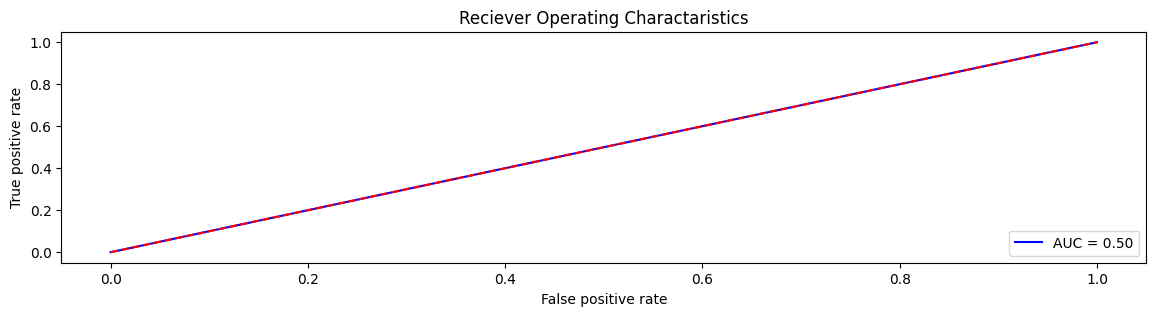

In [54]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc_val = auc(fpr, tpr)

plt.figure(figsize=(14,3))
plt.title('Reciever Operating Charactaristics')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % auc_val)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')


In [57]:
print(len(X_train.id))
print(len(y_pred))

476169
119043


15.   **Predict for unseen data set**

In [67]:
print(len(X_train['id'][:119043]))
print(len(y[:119043]))
print(len(y_pred))

119043
119043
119043


In [69]:
submit = pd.DataFrame({'id':list(X_train['id'][:119043]),'target':list(y[:119043]), 'predicted':y_pred})
submit

,id,target,predicted
0,97859,0,0
1,1195534,0,0
2,1367737,0,0
3,970233,0,0
4,158613,0,0
...,...,...,...
119038,1276427,0,0
119039,893435,0,0
119040,326774,0,0
119041,964626,0,0


In [60]:
# submission = pd.DataFrame.from_dict({'id': df['id'], 'predicted_value':y_pred})
#submit.to_csv('lr_porto.csv.gz',index=False,compression='gzip')


# submit.to_csv('submission.csv',index=False)